## You can find this dataset on 

## https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import statsmodels.formula.api as smf


C:\Users\bilal\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
A=pd.read_csv('wisc_bc_data.csv')
A.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
5,906539,B,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,...,13.07,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284
6,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.48,37.16,82.28,474.2,0.1298,0.2517,0.36300,0.09653,0.2112,0.08732
7,87880,M,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,...,19.20,41.85,128.50,1153.0,0.2226,0.5209,0.46460,0.20130,0.4432,0.10860
8,862989,B,10.49,19.29,67.41,336.1,0.09989,0.08578,0.02995,0.01201,...,11.54,23.31,74.22,402.8,0.1219,0.1486,0.07987,0.03203,0.2826,0.07552
9,89827,B,11.06,14.96,71.49,373.9,0.10330,0.09097,0.05397,0.03341,...,11.92,19.90,79.76,440.0,0.1418,0.2210,0.22990,0.10750,0.3301,0.09080


In [5]:
A.shape

(569, 32)

In [6]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [7]:
A.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

Here We can see that there are no null values in the data

In [8]:
A['diagnosis'].replace({'B':0,'M':1},inplace=True)

In [9]:
A.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


## Checking the significance of the features Statistically

In [10]:
from scipy.stats import ttest_ind

In [11]:
AG=A.groupby('diagnosis')

In [12]:
AG_B=AG.get_group(0)
AG_M=AG.get_group(1)

In [13]:
for col in A.columns:
  p_val=ttest_ind(AG_B[col],AG_M[col])[1]
  print(col,p_val)

id 0.34368185775951265
diagnosis 0.0
radius_mean 8.465940572262422e-96
texture_mean 4.058636047898073e-25
perimeter_mean 8.43625103617473e-101
area_mean 4.734564310307614e-88
smoothness_mean 1.0518503592035268e-18
compactness_mean 3.938263105886996e-56
concavity_mean 9.966555755072396e-84
points_mean 7.101150161057422e-116
symmetry_mean 5.733384028466827e-16
dimension_mean 0.7599368037256238
radius_se 9.738948656461507e-50
texture_se 0.8433320287670163
perimeter_se 1.6519051758498055e-47
area_se 5.895521392605863e-46
smoothness_se 0.11029660865789294
compactness_se 9.975994654074946e-13
concavity_se 8.260176167969961e-10
points_se 3.072308768818131e-24
symmetry_se 0.8766418183858812
dimension_se 0.06307355082239346
radius_worst 8.482291921684414e-116
texture_worst 1.0780574879493625e-30
perimeter_worst 5.771397139670263e-119
area_worst 2.828847704286693e-97
smoothness_worst 6.575143633984769e-26
compactness_worst 7.069816352539082e-55
concavity_worst 2.4646639567829224e-72
points_worst

### Here we can see that for the features 'diagnosis','texture_se','dimension_se','dimension_mean','smoothness_se','symmetry_se' , The p-value is greater than 0.5, So dropping this features

In [20]:
X=A.drop(['id','diagnosis','texture_se','dimension_se','dimension_mean','smoothness_se','symmetry_se',],axis=1)
y=A['diagnosis']

In [21]:
X.shape

(569, 25)

In [22]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.405172,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.277313,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.111500,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.232400,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.324200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.478900,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,2.873000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Scaling the independant variables

In [23]:
sc=StandardScaler()
X_std=sc.fit_transform(X)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


## Using GridSearchCV to get the best params for the Algorithms
## As we have more than 2 categories, we use ROC_AUC score as the metric for evaluating model performance as it takes into consideration both alpha and beta errors

### Finding best params for KNN

In [25]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param = {'n_neighbors':np.arange(1,70),'weights':['uniform','distance']}
GS=GridSearchCV(knn,param,cv=3,scoring='roc_auc')
GS.fit(X_std,y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [26]:
print('The best parameters for KNN are')
GS.best_params_

The best parameters for KNN are


{'n_neighbors': 22, 'weights': 'distance'}

### Finding best params for Decision Tree

In [30]:
dt = DecisionTreeClassifier(random_state=0)
param = {'max_depth':np.arange(3,70),'criterion':['entropy','gini'],'min_samples_leaf':np.arange(3,30)}
GS=GridSearchCV(dt,param,scoring='roc_auc')
GS.fit(X_std,y)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69]),
                         'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='roc_auc')

In [31]:
print('The best parameters for Decision Tree are')
GS.best_params_

The best parameters for Decision Tree are


{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 17}

### The best Params for Random Forest and Bagging models are found manually as GridSearch CV gives the result on the basis of highest auc_roc while we want to find the best model based on variance

### Finding best value of n_estimator for Random Forest

In [33]:
RF_var = []
for val in np.arange(1,50):
    RF = RandomForestClassifier(criterion='entropy',n_estimators=val,random_state=0)
    kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = model_selection.cross_val_score(RF,X_std,y,cv=kfold,scoring='roc_auc')
    RF_var.append(np.var(cv_results,ddof=1))
print('We get the lowest variance error for n_estimators =',np.argmin(RF_var)+1)


We get the lowest variance error for n_estimators = 8


### Finding best value of n_estimator for Bagging model 

In [34]:
Bag_var = []
for val in np.arange(1,100):
    Bag = BaggingClassifier(n_estimators=val,random_state=0)
    kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = model_selection.cross_val_score(Bag,X_std,y,cv=kfold,scoring='roc_auc')
    Bag_var.append(np.var(cv_results,ddof=1))
print('We get the lowest variance error for n_estimators =',np.argmin(Bag_var)+1)


We get the lowest variance error for n_estimators = 99


### Finding best value of n_estimator for AdaBoost model 

In [37]:
Ad_bias = []
for val in np.arange(1,100):
    Ad = AdaBoostClassifier(n_estimators=val,random_state=0)
    kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = model_selection.cross_val_score(Ad,X_std,y,cv=kfold,scoring='roc_auc')
    Ad_bias.append(1-np.mean(cv_results))
print('We get the lowest bias error for n_estimators =',np.argmin(Ad_bias)+1)
    

We get the lowest bias error for n_estimators = 93


### Finding best value of n_estimator for GradientBoost model 

In [38]:
bias = []
for val in np.arange(1,100):
    GB = GradientBoostingClassifier(n_estimators=val,random_state=0)
    kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = model_selection.cross_val_score(GB,X_std,y,cv=kfold,scoring='roc_auc')
    bias.append(1-np.mean(cv_results))
print('We get the lowest bias error for n_estimators =',np.argmin(bias)+1)
    

We get the lowest bias error for n_estimators = 99


In [39]:
LR=LogisticRegression()
NB=GaussianNB()
KNN=KNeighborsClassifier(n_neighbors=22,weights='distance')
DT=DecisionTreeClassifier(criterion='gini', max_depth=6,min_samples_leaf=17)
RF=RandomForestClassifier(criterion='gini',n_estimators=8)#Here using entropy as criterion as we got the best criterion for DT as Entropy
Bagged=BaggingClassifier(n_estimators=99,random_state=0)
AdaBoost=AdaBoostClassifier(n_estimators=93,random_state=0)
GBoost=GradientBoostingClassifier(n_estimators=99)


In [40]:
models=[]
models.append(('LogR',LR))
models.append(('NaiveB',NB))
models.append(('KNN',KNN))
models.append(('DecisionTree',DT))
models.append(('RandomForest',RF))
models.append(('BaggingClassifier',Bagged))
models.append(('AdaBoost',AdaBoost))
models.append(('GBoost',GBoost))


LogR: 0.995696 (0.000017)
NaiveB: 0.983621 (0.000152)
KNN: 0.992038 (0.000027)
DecisionTree: 0.971067 (0.000068)
RandomForest: 0.980470 (0.000266)
BaggingClassifier: 0.988537 (0.000119)
AdaBoost: 0.994186 (0.000006)
GBoost: 0.993754 (0.000041)


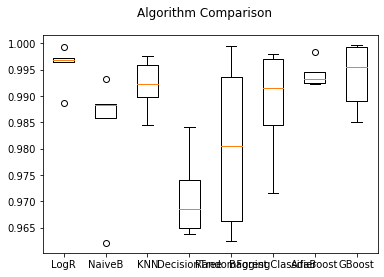

In [41]:
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_std, Y,cv=kfold, scoring='roc_auc')
	results.append(cv_results)
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## The 2 Best performing models are LogR and AdaBoost  

## Both are very close in performance but as LogR is a simple model and more interpretable then Adaboost, we are taking the best model as LogR

In [45]:
X_std.shape

(569, 25)

## Checking the performance of the model by taking random train and test

In [46]:
X_train=X_std[:400]
X_test = X_std[400:]
y_train = y[:400]
y_test = y[400:]

In [47]:
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [49]:
y_pred = LR.predict(X_test)

In [50]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_pred,y_test)
print(cm)

[[106   0]
 [  0  63]]
